## Example of Forward Feature Selection, Backward Feature Elimination, Exhaustive Feature Selection, Recursive Feature Elimination and Random Forest Importance.

In this model we are pridicting that 'will the customer churn or not' using random forest classifier. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
churn_data = pd.read_csv('data/churn_data.csv')
churn_data.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
customer_data = pd.read_csv('data/customer_data.csv')
customer_data.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [4]:
internet_data = pd.read_csv('data/internet_data.csv')
internet_data.isnull().sum()

customerID          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [5]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [8]:
datatemp = pd.merge(customer_data, internet_data, how = 'inner', on = 'customerID')
dataSet = pd.merge(datatemp, churn_data, how = 'inner', on = 'customerID')
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   gender            7042 non-null   object 
 2   SeniorCitizen     7042 non-null   int64  
 3   Partner           7042 non-null   object 
 4   Dependents        7042 non-null   object 
 5   MultipleLines     7042 non-null   object 
 6   InternetService   7042 non-null   object 
 7   OnlineSecurity    7042 non-null   object 
 8   OnlineBackup      7042 non-null   object 
 9   DeviceProtection  7042 non-null   object 
 10  TechSupport       7042 non-null   object 
 11  StreamingTV       7042 non-null   object 
 12  StreamingMovies   7042 non-null   object 
 13  tenure            7042 non-null   int64  
 14  PhoneService      7042 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7042 non-null   object 


In [9]:
dataSet.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
dataSet.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
unique_val = []
for i in dataSet:
    if(dataSet[i].dtype):
        unique_val.append(i)
        unique_val.append(dataSet[i].unique())
import pprint
pprint.pprint(unique_val)

['customerID',
 array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '2234-XADUH',
       '4801-JZAZL', '8361-LTMKD'], dtype=object),
 'gender',
 array(['Female', 'Male'], dtype=object),
 'SeniorCitizen',
 array([0, 1], dtype=int64),
 'Partner',
 array(['Yes', 'No'], dtype=object),
 'Dependents',
 array(['No', 'Yes'], dtype=object),
 'MultipleLines',
 array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService',
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity',
 array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup',
 array(['Yes', 'No', 'No internet service'], dtype=object),
 'DeviceProtection',
 array(['No', 'Yes', 'No internet service'], dtype=object),
 'TechSupport',
 array(['No', 'Yes', 'No internet service'], dtype=object),
 'StreamingTV',
 array(['No', 'Yes', 'No internet service'], dtype=object),
 'StreamingMovies',
 array(['No', 'Yes', 'No internet service'], dtype=object),
 'tenure',
 array([ 1, 34,  2, 45,  8, 22, 10, 2

Yes/No type attributes can be converted to [1,0]
but attributes with more information need dummy variables

In [12]:
yesnoToggle = {'Male':1, 'Female': 0,'Yes': 1, 'No': 0 ,'No internet service': 0}
toToggleAttr = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents', 'gender','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in toToggleAttr:
    dataSet[i] = dataSet[i].map(yesnoToggle)


In [13]:
con = pd.get_dummies(dataSet['Contract'], prefix='Contract')
dataSet = pd.concat([dataSet,con], axis=1)
dataSet = dataSet.drop('Contract', axis = 1)

ml = pd.get_dummies(dataSet['MultipleLines'], prefix = 'MultipleLines')
dataSet = pd.concat([dataSet, ml], axis= 1)
dataSet = dataSet.drop(['MultipleLines', 'MultipleLines_No phone service'], axis = 1)

isp = pd.get_dummies(dataSet['InternetService'], prefix = 'InternetService')
dataSet = pd.concat([dataSet, isp], axis = 1)
dataSet = dataSet.drop(['InternetService_No', 'InternetService'], axis = 1)

pm = pd.get_dummies(dataSet['PaymentMethod'], prefix = 'PaymentMethod')
dataSet = pd.concat([dataSet, pm], axis = 1)
dataSet = dataSet.drop('PaymentMethod', axis = 1)

dataSet['TotalCharges'] = pd.to_numeric(dataSet['TotalCharges'],errors = 'coerce')

In [14]:
dataSet.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract_One year,Contract_Two year,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [15]:
dataSet.info()
dataSet.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7042 non-null   object 
 1   gender                                   7042 non-null   int64  
 2   SeniorCitizen                            7042 non-null   int64  
 3   Partner                                  7042 non-null   int64  
 4   Dependents                               7042 non-null   int64  
 5   OnlineSecurity                           7042 non-null   int64  
 6   OnlineBackup                             7042 non-null   int64  
 7   DeviceProtection                         7042 non-null   int64  
 8   TechSupport                              7042 non-null   int64  
 9   StreamingTV                              7042 non-null   int64  
 10  StreamingMovies                          7042 no

customerID                                  0
gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
tenure                                      0
PhoneService                                0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
Contract_Month-to-month                     0
Contract_One year                           0
Contract_Two year                           0
MultipleLines_No                            0
MultipleLines_Yes                 

In [16]:
dataSet = dataSet.replace(np.nan, 0)

# Making Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [18]:
y = dataSet['Churn']
X = dataSet.drop( ['Churn', 'customerID'] ,axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=500)

model = RandomForestClassifier(n_estimators=30, criterion="entropy", random_state = 100, min_samples_split = 9, max_depth = 7)#, max_features = "sqrt")
model = model.fit(X_train,y_train)

y_pred_train = model.predict(X_train)
print('accuracy on train data:',metrics.accuracy_score(y_train, y_pred_train))

y_pred = model.predict(X_test)
print('accuracy on test data:',metrics.accuracy_score(y_test, y_pred))

accuracy on train data: 0.8137553256238588
accuracy on test data: 0.8182678655939423


Classifier Analysis Tools to analyse the model.

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1469  101]
 [ 283  260]]


In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thersh = roc_curve(y_test, y_pred)

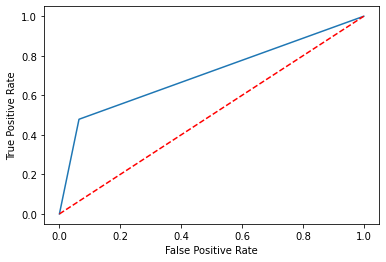

In [21]:
plt.figure()
plt.plot(fpr, tpr, label = 'Random Forest Classification')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [22]:
from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      1570
           1       0.72      0.48      0.58       543

    accuracy                           0.82      2113
   macro avg       0.78      0.71      0.73      2113
weighted avg       0.81      0.82      0.80      2113



Now we have a base case model where the model uses 28 features. This is a large number of feautures so we are going to use wrapper methods to reduce the complexity of the model by reducing the feature set.

# Forward Feature Selection

By using SequentialFeatureSelector in sklearn library.

In [23]:
from sklearn.feature_selection import SequentialFeatureSelector

In [24]:
testing = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state = 100, min_samples_split = 9, max_depth = 7)
ffs = SequentialFeatureSelector(testing, n_features_to_select=8, direction='forward', n_jobs=-1)

In [25]:
ffs.fit(X, y)
selection = ffs.get_support()
featureList = []
totalFeatureList = X.columns
for i, name in enumerate(totalFeatureList):
    if selection[i] == True:
        featureList.append(name)

In [26]:
newX=X[featureList]
X_train, X_test, y_train, y_test = train_test_split(newX, y, train_size=0.7, test_size=0.3, random_state=500)

In [27]:
testing.fit(X_train, y_train)

y_pred_train = testing.predict(X_train)
print('accuracy on train data:',metrics.accuracy_score(y_train, y_pred_train))

y_pred = testing.predict(X_test)
print('accuracy on test data:',metrics.accuracy_score(y_test, y_pred))

accuracy on train data: 0.808277541083384
accuracy on test data: 0.8069096071935636


In [28]:
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1570
           1       0.69      0.45      0.54       543

    accuracy                           0.81      2113
   macro avg       0.76      0.69      0.71      2113
weighted avg       0.79      0.81      0.79      2113



# Backward Feature Elimination

By using SequentialFeatureSelector in sklearn library

In [29]:
testing_back = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state = 100, min_samples_split = 9, max_depth = 7)
bfs = SequentialFeatureSelector(testing_back, n_features_to_select=8, direction='backward', n_jobs=-1)

In [30]:
bfs.fit(X, y)
selection = bfs.get_support()
featureList = []
totalFeatureList = X.columns
for i, name in enumerate(totalFeatureList):
    if selection[i] == True:
        featureList.append(name)

In [31]:
newX=X[featureList]
X_train, X_test, y_train, y_test = train_test_split(newX, y, train_size=0.7, test_size=0.3, random_state=500)

In [32]:
testing_back.fit(X_train, y_train)

y_pred_train = testing_back.predict(X_train)
print('accuracy on train data:',metrics.accuracy_score(y_train, y_pred_train))

y_pred = testing_back.predict(X_test)
print('accuracy on test data:',metrics.accuracy_score(y_test, y_pred))

accuracy on train data: 0.8153783728951106
accuracy on test data: 0.8130619971604354


In [33]:
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1570
           1       0.71      0.46      0.56       543

    accuracy                           0.81      2113
   macro avg       0.77      0.70      0.72      2113
weighted avg       0.80      0.81      0.80      2113



# Exhaustive Feature Selection

By using mlxtend library

In [35]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [39]:
efs = ExhaustiveFeatureSelector(RandomForestClassifier(n_estimators=12, criterion="entropy", random_state = 100, min_samples_split = 9, max_depth = 7),
                               min_features=2,
                               max_features=4,
                               scoring='roc_auc',
                               n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=500)
efs = efs.fit(X_train, y_train)

Features: 3000/17875IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 7682/17875IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 12375/17875IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
Notebo

In [40]:
print(X_train.columns[list(efs.best_idx_)])
print(efs.best_score_)

Index(['tenure', 'MonthlyCharges', 'Contract_One year', 'Contract_Two year'], dtype='object')
0.8260853485265647


In [43]:
testing_exhaust = RandomForestClassifier(n_estimators=12, criterion="entropy", random_state = 100, min_samples_split = 9, max_depth = 7)
newX = X[['tenure', 'MonthlyCharges', 'Contract_One year', 'Contract_Two year']]
X_train, X_test, y_train, y_test = train_test_split(newX, y, train_size=0.7, test_size=0.3, random_state=500)
testing_exhaust.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       n_estimators=12, random_state=100)

In [44]:
y_pred_train = testing_exhaust.predict(X_train)
print('accuracy on train data:',metrics.accuracy_score(y_train, y_pred_train))

y_pred = testing_exhaust.predict(X_test)
print('accuracy on test data:',metrics.accuracy_score(y_test, y_pred))

accuracy on train data: 0.8007709474538446
accuracy on test data: 0.795551348793185


In [45]:
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1570
           1       0.64      0.47      0.54       543

    accuracy                           0.80      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



# Recursive Feature Elimination

By using sklearn library

In [46]:
from sklearn.feature_selection import RFE
rfe=RFE(RandomForestClassifier(n_estimators=20, criterion="entropy", random_state = 100, min_samples_split = 9, max_depth = 7), n_features_to_select=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=500)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(criterion='entropy', max_depth=7,
                                     min_samples_split=9, n_estimators=20,
                                     random_state=100),
    n_features_to_select=8)

In [47]:
y_pred_train = rfe.predict(X_train)
print('accuracy on train data:',metrics.accuracy_score(y_train, y_pred_train))

y_pred = rfe.predict(X_test)
print('accuracy on test data:',metrics.accuracy_score(y_test, y_pred))

accuracy on train data: 0.8113207547169812
accuracy on test data: 0.8092759110269758


In [48]:
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1570
           1       0.68      0.48      0.56       543

    accuracy                           0.81      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.80      0.81      0.80      2113



# Random Forest Importance

A embedded method of feature selection using the feature importance to rank attributes ans selecting from it

In [18]:
y = dataSet['Churn']
X = dataSet.drop( ['Churn', 'customerID'] ,axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=500)

In [20]:
model = RandomForestClassifier(n_estimators=30, criterion="entropy", random_state = 100, min_samples_split = 9, max_depth = 7)
model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       n_estimators=30, random_state=100)

In [21]:
importance = model.feature_importances_

In [41]:
feature_id = X.columns

Text(0, 0.5, 'importace')

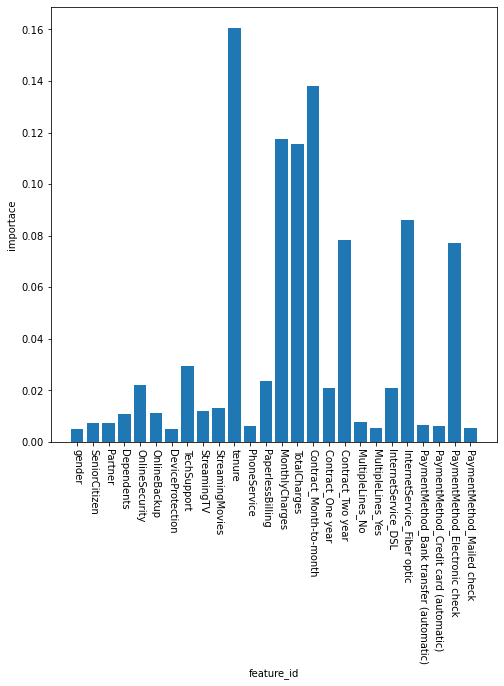

In [45]:
plt.figure(figsize=(8,8))
plt.bar(feature_id,importance)
plt.xlabel("feature_id")
plt.xticks(rotation=270)
plt.ylabel("importace")

this barplot of feature vs importance help us to identify those features which have high importance. We select adequate number of feature to make model simple yet accurate.